# Laboratorio Regresión y clasificación
---
Giovanny Alejandro Cuervo Londoño

1. Construya una red neuronal de clasificación binaria para predecir el cáncer de seno. Use los datos <a srf=https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>Breast Cancer Wisconsin</a>. Los datos los puede encontrar en el enlace de Kaggle.


2. Construya una red neuronal de regresión poara predecir el precio de las viviendas. Use los datos <a src= https://www.kaggle.com/c/boston-housing>Boston Housing</a>.  Los datos los puede encontrar en el enlace de Kaggle.




* **0. Importamos los paquetes necesarios** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Seaborn' , sns.__version__)
print('Tensor Flow', tf.__version__)

Numpy 1.19.5
Pandas 1.1.5
Seaborn 0.11.1
Tensor Flow 2.4.1


Este notebook se hizo con las librerías
> Numpy 1.19.5

> Pandas 1.1.5

> Seaborn 0.11.1

> Tensor Flow 2.4.1

* **0. Funciones Necesarias definidas** 

In [3]:
def list_confusion_matrix(cm,classes):
  df = pd.DataFrame(data = cm,
                    index = pd.MultiIndex.from_product([['Valor real'], classes]),
                    columns = pd.MultiIndex.from_product([['Valor predicho'], classes]))
  
  return df

In [4]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

## I. Red neuronal de Clasificación Binaria
### Breast Cancer Wisconsin
---


* 1. Cargamos los datos y las etiquetas objetivo

In [5]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target


print(f'Datos(filas, columnas){X.shape}y tipo: {type(X)}\nEtiquetas(número): {y.shape} y tipo: {type(y)}')

Datos(filas, columnas)(569, 30)y tipo: <class 'numpy.ndarray'>
Etiquetas(número): (569,) y tipo: <class 'numpy.ndarray'>


* 1.1 Exploramos los features

In [6]:
print(f'{data.feature_names}') #como numpy array
print(f'{X[0, :]} \ncantidad de features: {len(X[0, :])}') #primer fila

df_X = pd.DataFrame(dict(zip(data.feature_names, X))) #como DataFrame
df_X[:5] #primeras 5 filas

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 
cantidad de features: 30


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.9900,20.57000,19.6900,11.4200,20.2900,12.4500,18.25000,13.7100,13.0000,12.4600,16.02000,15.7800,19.1700,15.85000,13.7300,14.5400,14.68000,16.130,19.81000,13.54000,13.0800,9.5040,15.3400,21.16000,16.6500,17.1400,14.5800,18.6100,15.3000,17.57000
1,10.3800,17.77000,21.2500,20.3800,14.3400,15.7000,19.98000,20.8300,21.8200,24.0400,23.24000,17.8900,24.8000,23.95000,22.6100,27.5400,20.13000,20.680,22.15000,14.36000,15.7100,12.4400,14.2600,23.04000,21.3800,16.4000,21.5300,20.2500,25.2700,15.05000
2,122.8000,132.90000,130.0000,77.5800,135.1000,82.5700,119.60000,90.2000,87.5000,83.9700,102.70000,103.6000,132.4000,103.70000,93.6000,96.7300,94.74000,108.100,130.00000,87.46000,85.6300,60.3400,102.5000,137.20000,110.0000,116.0000,97.4100,122.1000,102.4000,115.00000
3,1001.0000,1326.00000,1203.0000,386.1000,1297.0000,477.1000,1040.00000,577.9000,519.8000,475.9000,797.80000,781.0000,1123.0000,782.70000,578.3000,658.8000,684.50000,798.800,1260.00000,566.30000,520.0000,273.9000,704.4000,1404.00000,904.6000,912.7000,644.8000,1094.0000,732.4000,955.10000
4,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,0.08206,0.0971,0.0974,0.08401,0.1131,0.1139,0.09867,0.117,0.09831,0.09779,0.1075,0.1024,0.1073,0.09428,0.1121,0.1186,0.1054,0.0944,0.1082,0.09847


* 1.2 Exploramos  los target

In [7]:
print(f'{data.target_names[0]}:{np.unique(y)[0]}, {data.target_names[1]}:{np.unique(y)[1]}')


malignant:0, benign:1


In [8]:
print(f'conteo \nmalignant: {list(y).count(0)} \nbenign:{list(y).count(1)}')
#vemos un ligero desbalance donde hay más benign 

conteo 
malignant: 212 
benign:357


* **2. dividimos los datos en test y train**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

In [10]:
print(f'X test: {X_test.shape} & X train: {X_train.shape}')
print(f'y test: {y_test.shape} & y train: {y_train.shape}')

X test: (171, 30) & X train: (398, 30)
y test: (171,) & y train: (398,)


* **3. Normalizamos los datos**

In [11]:
from sklearn.preprocessing import StandardScaler

normalizar = StandardScaler()
X_train = normalizar.fit_transform(X_train)
X_test = normalizar.transform(X_test) #por que este y no transform

* **4. Definimos la arquitectura**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 

model = Sequential()

## add(): Adiciona capas una por una
# layers.Dense(): Coloca una capa densa
model.add(layers.Dense(units=16, activation='relu', input_shape=(30,), name='dense_1')) #capa de entrada 16 neuronas

#layers.dropout(): esto previene el overfitting (Regularización)
model.add(layers.Dropout(0.1)) # 10% de las neuronas son descativadas en cada epoca
model.add(layers.Dense(units=16, activation='relu', name='dense_2')) #capa oculta 16 neuronas

model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=1, activation='sigmoid', name='dense_3')) #capa de salida 1 neurona



* **5. Compilamos el modelo**

1er capa entrada: 496 parámetros 
2da capa oculta: 272 parámetros 
3er capa salida: 17 parámetros 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


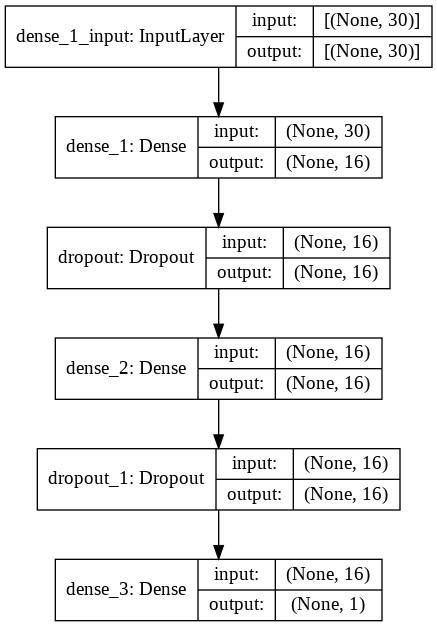

In [13]:
from tensorflow.keras import utils

print(f'1er capa entrada: {16*30+16} parámetros \n2da capa oculta: {16*16+16} parámetros \n3er capa salida: {16+1} parámetros \n')
#1er capa 16 neuronas * 30 columnas X_train + 16 bias o intercerptos
#2da capa 16 neuronas * 16 neuronas 1er capa + 16 bias o intercerptos
#3er capa 16 neuronas 2da capa + 1 neurona 3er capa

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()
utils.plot_model(model, show_shapes=True)


* **6. Entrenamiento**

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split = 0.2)

Epoch 1/150
10/10 [==============================] - 1s 29ms/step - loss: 0.8460 - accuracy: 0.2915 - val_loss: 0.6815 - val_accuracy: 0.5500
Epoch 2/150
10/10 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5463 - val_loss: 0.5623 - val_accuracy: 0.8125
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5815 - accuracy: 0.7623 - val_loss: 0.4723 - val_accuracy: 0.9250
Epoch 4/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5173 - accuracy: 0.8367 - val_loss: 0.3988 - val_accuracy: 0.9875
Epoch 5/150
10/10 [==============================] - 0s 6ms/step - loss: 0.4567 - accuracy: 0.8957 - val_loss: 0.3324 - val_accuracy: 0.9875
Epoch 6/150
10/10 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.9099 - val_loss: 0.2735 - val_accuracy: 1.0000
Epoch 7/150
10/10 [==============================] - 0s 6ms/step - loss: 0.3513 - accuracy: 0.9120 - val_loss: 0.2222 - val_accuracy: 1.0000
Epoch 8/150


* **7. Predicciones**

Dado que la función de activación es sigmoid, las predicciones > 0.5 serán de la clase 1 y las predicciones <= 0.5 serán de la clase 0

<image src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png >

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

print(f'predichos \nmalignant: {list(y_pred).count(0)} \nbenign:{list(y_pred).count(1)}')

predichos 
malignant: 65 
benign:106


* **8. Evaluación del modelo**

Nuestra precisión es 95.90643274853801


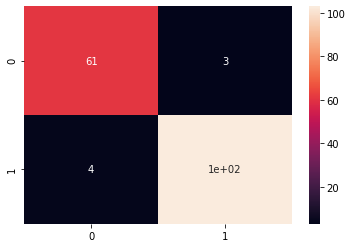

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(f"Nuestra precisión es {((cm[0][0] + cm[1][1])/y_test.shape[0])*100}")

sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [ ]:
class_names = data.target_names
list_confusion_matrix(cm, class_names)

Valor predicho       
                          malignant benign
Valor real malignant             61      3
           benign                 4    103

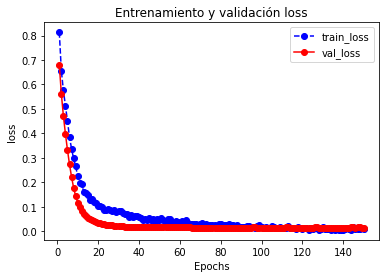

In [ ]:
plot_metric(history, 'loss')

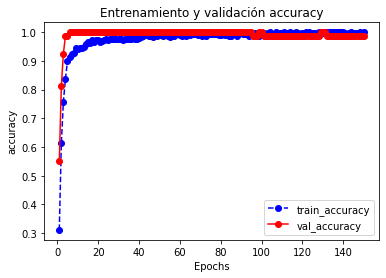

In [ ]:
plot_metric(history, 'accuracy')

## I. Red neuronal de regresión
### Boston Housing
---


* 1. Cargamos los datos y las etiquetas objetivo

In [15]:
from sklearn.datasets import load_boston

data = load_boston()
X = data.data
y = data.target

print(f'Datos(filas, columnas){X.shape} y tipo: {type(X)}\nEtiquetas(número): {y.shape} y tipo: {type(y)}')

Datos(filas, columnas)(506, 13) y tipo: <class 'numpy.ndarray'>
Etiquetas(número): (506,) y tipo: <class 'numpy.ndarray'>


* 1.1 Exploramos los features

In [16]:
print(f'{data.feature_names}') #como numpy array
print(f'{X[0, :]} \ncantidad de features: {len(X[0, :])}') #primer fila

df_X = pd.DataFrame(dict(zip(data.feature_names, X))) #como DataFrame
df_X[:5] #primeras 5 filas

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00] 
cantidad de features: 13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004,0.22489,0.11747,0.09378
1,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000,12.50000,12.50000,12.50000
2,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000,7.87000,7.87000,7.87000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400,0.52400,0.52400,0.52400


* 1.2 Exploramos  los target

In [17]:
print(data.keys())
#usando data.DESCR encontramos que la variable a predecir es MEDV
print("MEDV: Median value of owner-occupied homes in $1000's")
pd.DataFrame({'MEDV': y}).describe()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
MEDV: Median value of owner-occupied homes in $1000's


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


* **2. dividimos los datos en test y train**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
print(f'X test: {X_test.shape} & X train: {X_train.shape}')
print(f'y test: {y_test.shape} & y train: {y_train.shape}')

X test: (152, 13) & X train: (354, 13)
y test: (152,) & y train: (354,)


* **3. Normalizamos los datos**

In [20]:
from sklearn.preprocessing import StandardScaler

normalizar = StandardScaler()
X_train = normalizar.fit_transform(X_train)
X_test = normalizar.transform(X_test) #por que este y no transform

* **4. Definimos la arquitectura**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 

model = Sequential()

## add(): Adiciona capas una por una
# layers.Dense(): Coloca una capa densa
model.add(layers.Dense(units=128, activation='relu', input_shape=(13,), name='dense_1')) #capa de entrada 128 neuronas
,
#layers.dropout(): esto previene el overfitting (Regularización)
model.add(layers.Dropout(0.1)) # 10% de las neuronas son descativadas en cada epoca
model.add(layers.Dense(units=64, activation='relu', name='dense_2')) #capa oculta 64 neuronas

model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=1, activation='linear', name='dense_3')) #capa de salida 1 neurona

* **5. Compilamos el modelo**

1er capa entrada: 1792 parámetros 
2da capa oculta: 8256 parámetros 
3er capa salida: 65 parámetros 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


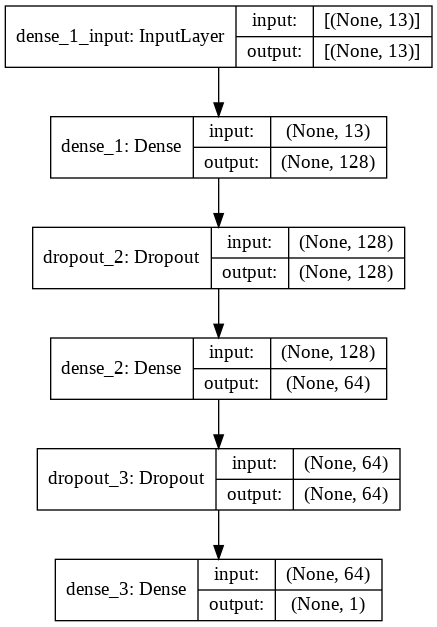

In [22]:
from tensorflow.keras import utils

print(f'1er capa entrada: {128*13+128} parámetros \n2da capa oculta: {64*128+64} parámetros \n3er capa salida: {64+1} parámetros \n')
#1er capa 128 neuronas * 13 columnas X_train + 128 bias o intercerptos
#2da capa 64 neuronas * 128 neuronas 1er capa + 64 bias o intercerptos
#3er capa 16 neuronas 2da capa + 1 neurona 3er capa

#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()
utils.plot_model(model, show_shapes=True)


* **6. Entrenamiento**

In [23]:
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split = 0.2)

Epoch 1/150
9/9 [==============================] - 1s 63ms/step - loss: 567.0147 - mae: 22.1823 - val_loss: 513.9339 - val_mae: 20.8017
Epoch 2/150
9/9 [==============================] - 0s 8ms/step - loss: 552.0472 - mae: 21.4508 - val_loss: 452.3380 - val_mae: 19.3257
Epoch 3/150
9/9 [==============================] - 0s 7ms/step - loss: 457.5113 - mae: 19.4374 - val_loss: 375.8705 - val_mae: 17.4150
Epoch 4/150
9/9 [==============================] - 0s 7ms/step - loss: 414.9970 - mae: 18.1236 - val_loss: 283.2447 - val_mae: 14.9354
Epoch 5/150
9/9 [==============================] - 0s 7ms/step - loss: 288.8413 - mae: 14.9527 - val_loss: 186.6338 - val_mae: 11.7990
Epoch 6/150
9/9 [==============================] - 0s 8ms/step - loss: 191.4245 - mae: 11.7227 - val_loss: 106.6706 - val_mae: 8.3213
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 114.5957 - mae: 8.5192 - val_loss: 65.5477 - val_mae: 6.1440
Epoch 8/150
9/9 [==============================] - 0s 7ms/

* **7. Predicciones**



In [24]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
145,9.050806,2.198735,9.965225,2.303628,145
146,9.956330,2.298265,9.637858,2.277468,146
147,8.233363,2.090091,9.353485,2.242594,147
148,8.377262,2.245930,9.377742,2.249431,148
149,9.042333,2.200878,9.185776,2.246857,149


* **8. Evaluación del modelo**

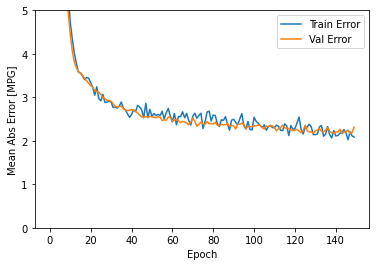

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.show()


plot_history(history)

In [30]:
y_pred = model.predict(X_test).flatten()
y_pred.shape

(152,)

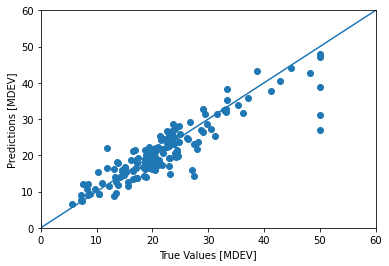

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MDEV]')
plt.ylabel('Predictions [MDEV]')
plt.xlim([0, 60])
plt.ylim([0, 60])
_ = plt.plot([0, 60], [0, 60])